In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import os

## Prepare dataset

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), 'abalone-data.txt'),
                  names=['sex', 'length', 'diameter', 'height', 'whole_weight',
                        'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])

In [3]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data['sex'] = LabelEncoder().fit_transform(data['sex'])
data = pd.get_dummies(data, columns=['sex'])

In [5]:
data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_0,sex_1,sex_2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [6]:
X = data.drop('rings', axis=1)
y = data['rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=3)
print('Training data = {}, {}'.format(X_train.shape, y_train.shape))
print('Validation data = {}, {}'.format(X_val.shape, y_val.shape))
print('Testing data = {}, {}'.format(X_test.shape, y_test.shape))

Training data = (3383, 10), (3383,)
Validation data = (376, 10), (376,)
Testing data = (418, 10), (418,)


In [7]:
# standardize continuous values to zero mean and unit variance
scaler = StandardScaler()
X_train[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']] = scaler.fit_transform(
    X_train[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])

In [8]:
X_val[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']] = scaler.transform(
    X_val[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']] = scaler.transform(
    X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])

/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([1, 2])

## Linear model

In [11]:
model_lin = keras.Sequential([
    keras.layers.Dense(1, input_shape=(10,)),
])
optimizer = tf.train.GradientDescentOptimizer(0.001)
model_lin.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [12]:
history_lin = model_lin.fit(X_train, y_train, epochs=200, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/200
3383/3383 [==============================] - 1s 194us/step - loss: 86.1086 - mean_absolute_error: 8.6949 - val_loss: 63.1629 - val_mean_absolute_error: 7.4668
Epoch 2/200
3383/3383 [==============================] - 0s 45us/step - loss: 50.4773 - mean_absolute_error: 6.5492 - val_loss: 38.6151 - val_mean_absolute_error: 5.6306
Epoch 3/200
3383/3383 [==============================] - 0s 76us/step - loss: 31.5219 - mean_absolute_error: 4.9441 - val_loss: 24.7441 - val_mean_absolute_error: 4.2393
Epoch 4/200
3383/3383 [==============================] - 0s 87us/step - loss: 20.7914 - mean_absolute_error: 3.7394 - val_loss: 16.8539 - val_mean_absolute_error: 3.2274
Epoch 5/200
3383/3383 [==============================] - 0s 62us/step - loss: 14.6774 - mean_absolute_error: 2.8816 - val_loss: 12.3247 - val_mean_absolute_error: 2.5317
Epoch 6/200
3383/3383 [==============================] - 0s 55us/step - loss: 11.1681 - mean_absolute_

Epoch 49/200
3383/3383 [==============================] - 0s 68us/step - loss: 5.1201 - mean_absolute_error: 1.6091 - val_loss: 4.9372 - val_mean_absolute_error: 1.5988
Epoch 50/200
3383/3383 [==============================] - 0s 45us/step - loss: 5.1127 - mean_absolute_error: 1.6086 - val_loss: 4.9258 - val_mean_absolute_error: 1.5971
Epoch 51/200
3383/3383 [==============================] - 0s 43us/step - loss: 5.1041 - mean_absolute_error: 1.6084 - val_loss: 4.9187 - val_mean_absolute_error: 1.5953
Epoch 52/200
3383/3383 [==============================] - 0s 49us/step - loss: 5.0956 - mean_absolute_error: 1.6056 - val_loss: 4.9084 - val_mean_absolute_error: 1.5940
Epoch 53/200
3383/3383 [==============================] - 0s 45us/step - loss: 5.0879 - mean_absolute_error: 1.6055 - val_loss: 4.9012 - val_mean_absolute_error: 1.5926
Epoch 54/200
3383/3383 [==============================] - 0s 46us/step - loss: 5.0803 - mean_absolute_error: 1.6037 - val_loss: 4.9012 - val_mean_absolute_

3383/3383 [==============================] - 0s 48us/step - loss: 4.9446 - mean_absolute_error: 1.5896 - val_loss: 4.8043 - val_mean_absolute_error: 1.5761
Epoch 98/200
3383/3383 [==============================] - 0s 40us/step - loss: 4.9434 - mean_absolute_error: 1.5885 - val_loss: 4.8040 - val_mean_absolute_error: 1.5761
Epoch 99/200
3383/3383 [==============================] - 0s 46us/step - loss: 4.9420 - mean_absolute_error: 1.5888 - val_loss: 4.7896 - val_mean_absolute_error: 1.5753
Epoch 100/200
3383/3383 [==============================] - 0s 48us/step - loss: 4.9410 - mean_absolute_error: 1.5894 - val_loss: 4.7897 - val_mean_absolute_error: 1.5750
Epoch 101/200
3383/3383 [==============================] - 0s 44us/step - loss: 4.9399 - mean_absolute_error: 1.5886 - val_loss: 4.7958 - val_mean_absolute_error: 1.5749
Epoch 102/200
3383/3383 [==============================] - 0s 47us/step - loss: 4.9385 - mean_absolute_error: 1.5861 - val_loss: 4.7904 - val_mean_absolute_error: 1.5

Epoch 145/200
3383/3383 [==============================] - 0s 40us/step - loss: 4.9141 - mean_absolute_error: 1.5869 - val_loss: 4.7764 - val_mean_absolute_error: 1.5739
Epoch 146/200
3383/3383 [==============================] - 0s 44us/step - loss: 4.9134 - mean_absolute_error: 1.5871 - val_loss: 4.7811 - val_mean_absolute_error: 1.5737
Epoch 147/200
3383/3383 [==============================] - 0s 43us/step - loss: 4.9129 - mean_absolute_error: 1.5858 - val_loss: 4.7809 - val_mean_absolute_error: 1.5741
Epoch 148/200
3383/3383 [==============================] - 0s 52us/step - loss: 4.9122 - mean_absolute_error: 1.5858 - val_loss: 4.7825 - val_mean_absolute_error: 1.5741
Epoch 149/200
3383/3383 [==============================] - 0s 42us/step - loss: 4.9126 - mean_absolute_error: 1.5865 - val_loss: 4.7807 - val_mean_absolute_error: 1.5738
Epoch 150/200
3383/3383 [==============================] - 0s 43us/step - loss: 4.9119 - mean_absolute_error: 1.5853 - val_loss: 4.7761 - val_mean_abs

3383/3383 [==============================] - 0s 46us/step - loss: 4.8978 - mean_absolute_error: 1.5849 - val_loss: 4.7792 - val_mean_absolute_error: 1.5736
Epoch 194/200
3383/3383 [==============================] - 0s 58us/step - loss: 4.9006 - mean_absolute_error: 1.5848 - val_loss: 4.7693 - val_mean_absolute_error: 1.5732
Epoch 195/200
3383/3383 [==============================] - 0s 64us/step - loss: 4.8998 - mean_absolute_error: 1.5856 - val_loss: 4.7688 - val_mean_absolute_error: 1.5729
Epoch 196/200
3383/3383 [==============================] - 0s 75us/step - loss: 4.8989 - mean_absolute_error: 1.5851 - val_loss: 4.7600 - val_mean_absolute_error: 1.5726
Epoch 197/200
3383/3383 [==============================] - 0s 73us/step - loss: 4.8990 - mean_absolute_error: 1.5845 - val_loss: 4.7586 - val_mean_absolute_error: 1.5727
Epoch 198/200
3383/3383 [==============================] - 0s 71us/step - loss: 4.8994 - mean_absolute_error: 1.5850 - val_loss: 4.7590 - val_mean_absolute_error: 1

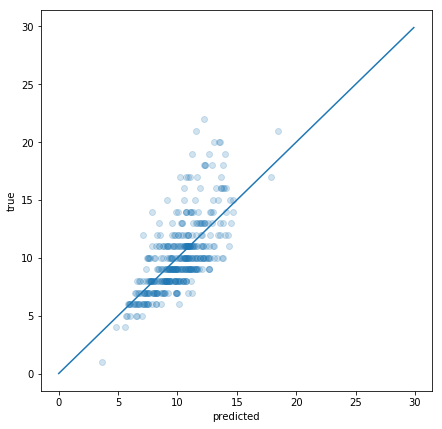

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(model_lin.predict(X_test), y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## 1 layer - sigmoid

In [33]:
model_sig = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.sigmoid, input_shape=(10,)),
    keras.layers.Dense(1)
])
optimizer = tf.train.GradientDescentOptimizer(0.01)
model_sig.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [34]:
history_sig = model_sig.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 0s 123us/step - loss: 14.3879 - mean_absolute_error: 2.5446 - val_loss: 6.2767 - val_mean_absolute_error: 1.8800
Epoch 2/100
3383/3383 [==============================] - 0s 38us/step - loss: 6.2339 - mean_absolute_error: 1.7968 - val_loss: 5.9171 - val_mean_absolute_error: 1.7915
Epoch 3/100
3383/3383 [==============================] - 0s 42us/step - loss: 5.8633 - mean_absolute_error: 1.7355 - val_loss: 5.5124 - val_mean_absolute_error: 1.7443
Epoch 4/100
3383/3383 [==============================] - 0s 46us/step - loss: 5.5799 - mean_absolute_error: 1.6946 - val_loss: 5.3396 - val_mean_absolute_error: 1.6724
Epoch 5/100
3383/3383 [==============================] - 0s 46us/step - loss: 5.3514 - mean_absolute_error: 1.6503 - val_loss: 5.1361 - val_mean_absolute_error: 1.6763
Epoch 6/100
3383/3383 [==============================] - 0s 40us/step - loss: 5.1886 - mean_absolute_error: 1.6

3383/3383 [==============================] - 0s 35us/step - loss: 4.2821 - mean_absolute_error: 1.4633 - val_loss: 4.0286 - val_mean_absolute_error: 1.4636
Epoch 98/100
3383/3383 [==============================] - 0s 36us/step - loss: 4.2858 - mean_absolute_error: 1.4612 - val_loss: 3.9846 - val_mean_absolute_error: 1.4671
Epoch 99/100
3383/3383 [==============================] - 0s 35us/step - loss: 4.2860 - mean_absolute_error: 1.4630 - val_loss: 4.0086 - val_mean_absolute_error: 1.4619
Epoch 100/100
3383/3383 [==============================] - 0s 34us/step - loss: 4.2793 - mean_absolute_error: 1.4619 - val_loss: 4.0024 - val_mean_absolute_error: 1.4643


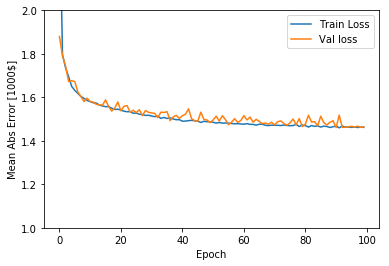

In [35]:
plot_history(history_sig)

## 1 layer - relu

In [37]:
model1 = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(10,)),
    keras.layers.Dense(1, activation=tf.nn.relu)
])
optimizer = tf.train.GradientDescentOptimizer(0.01)
model1.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [38]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [43]:
history1 = model1.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 0s 146us/step - loss: 11.6074 - mean_absolute_error: 2.3073 - val_loss: 5.5523 - val_mean_absolute_error: 1.7580
Epoch 2/100
3383/3383 [==============================] - 0s 38us/step - loss: 5.4173 - mean_absolute_error: 1.6597 - val_loss: 4.8486 - val_mean_absolute_error: 1.5593
Epoch 3/100
3383/3383 [==============================] - 0s 40us/step - loss: 5.0974 - mean_absolute_error: 1.6111 - val_loss: 5.5969 - val_mean_absolute_error: 1.7733
Epoch 4/100
3383/3383 [==============================] - 0s 39us/step - loss: 4.9927 - mean_absolute_error: 1.6038 - val_loss: 4.6091 - val_mean_absolute_error: 1.5739
Epoch 5/100
3383/3383 [==============================] - 0s 37us/step - loss: 4.9751 - mean_absolute_error: 1.6003 - val_loss: 4.5396 - val_mean_absolute_error: 1.5577
Epoch 6/100
3383/3383 [==============================] - 0s 42us/step - loss: 4.8898 - mean_absolute_error: 1.5

3383/3383 [==============================] - 0s 41us/step - loss: 4.2920 - mean_absolute_error: 1.4696 - val_loss: 4.1079 - val_mean_absolute_error: 1.4766
Epoch 98/100
3383/3383 [==============================] - 0s 39us/step - loss: 4.2937 - mean_absolute_error: 1.4705 - val_loss: 4.2797 - val_mean_absolute_error: 1.4822
Epoch 99/100
3383/3383 [==============================] - 0s 45us/step - loss: 4.3204 - mean_absolute_error: 1.4765 - val_loss: 4.2021 - val_mean_absolute_error: 1.5442
Epoch 100/100
3383/3383 [==============================] - 0s 46us/step - loss: 4.3195 - mean_absolute_error: 1.4731 - val_loss: 5.0233 - val_mean_absolute_error: 1.6824


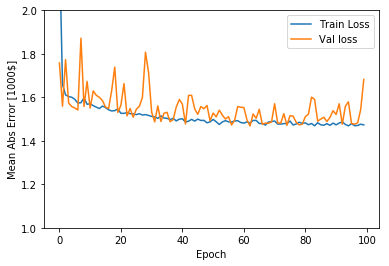

In [44]:
plot_history(history1)

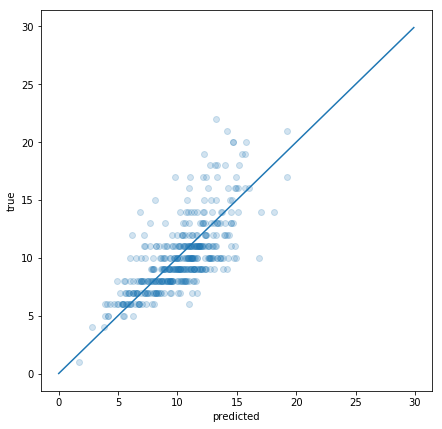

In [45]:
pred = model1.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## 2 layers - relu

In [41]:
model2 = keras.Sequential([
    keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(10,)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu)
])
optimizer = tf.train.GradientDescentOptimizer(0.01)
model2.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 155       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [46]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 0s 104us/step - loss: 14.0064 - mean_absolute_error: 2.4221 - val_loss: 4.8140 - val_mean_absolute_error: 1.6039
Epoch 2/100
3383/3383 [==============================] - 0s 50us/step - loss: 5.8237 - mean_absolute_error: 1.6977 - val_loss: 5.1605 - val_mean_absolute_error: 1.7443
Epoch 3/100
3383/3383 [==============================] - 0s 49us/step - loss: 5.4439 - mean_absolute_error: 1.6835 - val_loss: 5.5748 - val_mean_absolute_error: 1.8423
Epoch 4/100
3383/3383 [==============================] - 0s 44us/step - loss: 5.0803 - mean_absolute_error: 1.6192 - val_loss: 4.4775 - val_mean_absolute_error: 1.5867
Epoch 5/100
3383/3383 [==============================] - 0s 44us/step - loss: 5.0405 - mean_absolute_error: 1.6239 - val_loss: 5.2055 - val_mean_absolute_error: 1.7791
Epoch 6/100
3383/3383 [==============================] - 0s 55us/step - loss: 4.9537 - mean_absolute_error: 1.6

3383/3383 [==============================] - 0s 84us/step - loss: 4.1970 - mean_absolute_error: 1.4551 - val_loss: 4.2468 - val_mean_absolute_error: 1.5455
Epoch 98/100
3383/3383 [==============================] - 0s 67us/step - loss: 4.0973 - mean_absolute_error: 1.4356 - val_loss: 4.1683 - val_mean_absolute_error: 1.4799
Epoch 99/100
3383/3383 [==============================] - 0s 47us/step - loss: 4.1451 - mean_absolute_error: 1.4382 - val_loss: 4.3385 - val_mean_absolute_error: 1.5086
Epoch 100/100
3383/3383 [==============================] - 0s 42us/step - loss: 4.1206 - mean_absolute_error: 1.4437 - val_loss: 4.1063 - val_mean_absolute_error: 1.4787


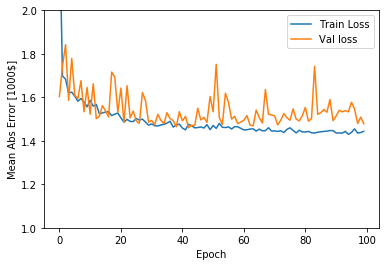

In [47]:
plot_history(history2)

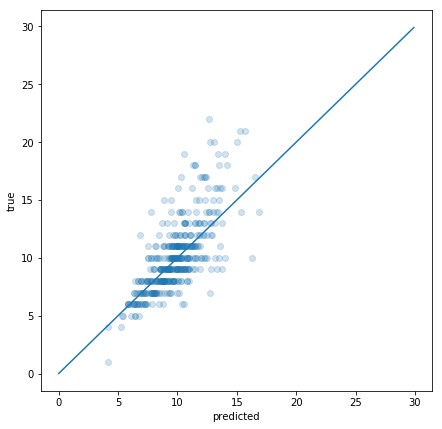

In [48]:
pred = model2.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## Save weights

In [49]:
weights_lin = model_lin.get_weights()
weights_sig = model_sig.get_weights()
weights1 = model1.get_weights()
weights2 = model2.get_weights()

In [50]:
np.save('model_lin_weights', weights_lin, allow_pickle=True)
np.save('model_sig_weights', weights_sig, allow_pickle=True)
np.save('model1_weights', weights1, allow_pickle=True)
np.save('model2_weights', weights2, allow_pickle=True)